In [419]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

Data Cleaning and preping for modeling 

In [420]:
#let's start with importing our data 
#we are improting two dataets at the same time 
#because it is like in a movie Tenet, we are coming back here from the future where K-Means classifier already been feed with training data and ready for testing
df = pd.read_csv('train.csv')
df_test = pd.read_csv('recommend.csv')

First let's see what kind of columns we have in our database + identify if there is any differences between our DFs 

In [421]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'topic', 'age'],
      dtype='object')

In [422]:
df_test.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'topic',
       'age'],
      dtype='object')

To make our resutls more understandable we need to identify some columns that can help us make sense of results 

In [423]:
#Our selection of identifiers are: 
identifiers =  ['artist_name', 'track_name','release_date', 'genre', 'topic']

Time to selects columns for drop! 

So far we are confident that we can drop these columns: 

Unnamed: 0, useless index column 
Lyrics is not useful for K-means classifier 
like/girls is exclusive for our TEST databse and don't have representation in TRAIN DF

In [424]:
columns_to_drop = ['Unnamed: 0', 'lyrics']
columns_to_drop_test = ['Unnamed: 0', 'lyrics', 'like/girls']

Time to create our cleaned DF. Drop previously stated columns

In [425]:
df_cleaned = df.drop(columns=columns_to_drop)
df_test_cleaned = df_test.drop(columns= columns_to_drop_test)

Additionally need to drop our identifiers. They are categorical values and will not work with our model and heatmap. 

In [426]:
df_cleaned_heatmap = df_cleaned.drop(columns=identifiers)
df_test_cleaned_heatmap = df_test_cleaned.drop(columns=identifiers)

Time for heatmaps! 

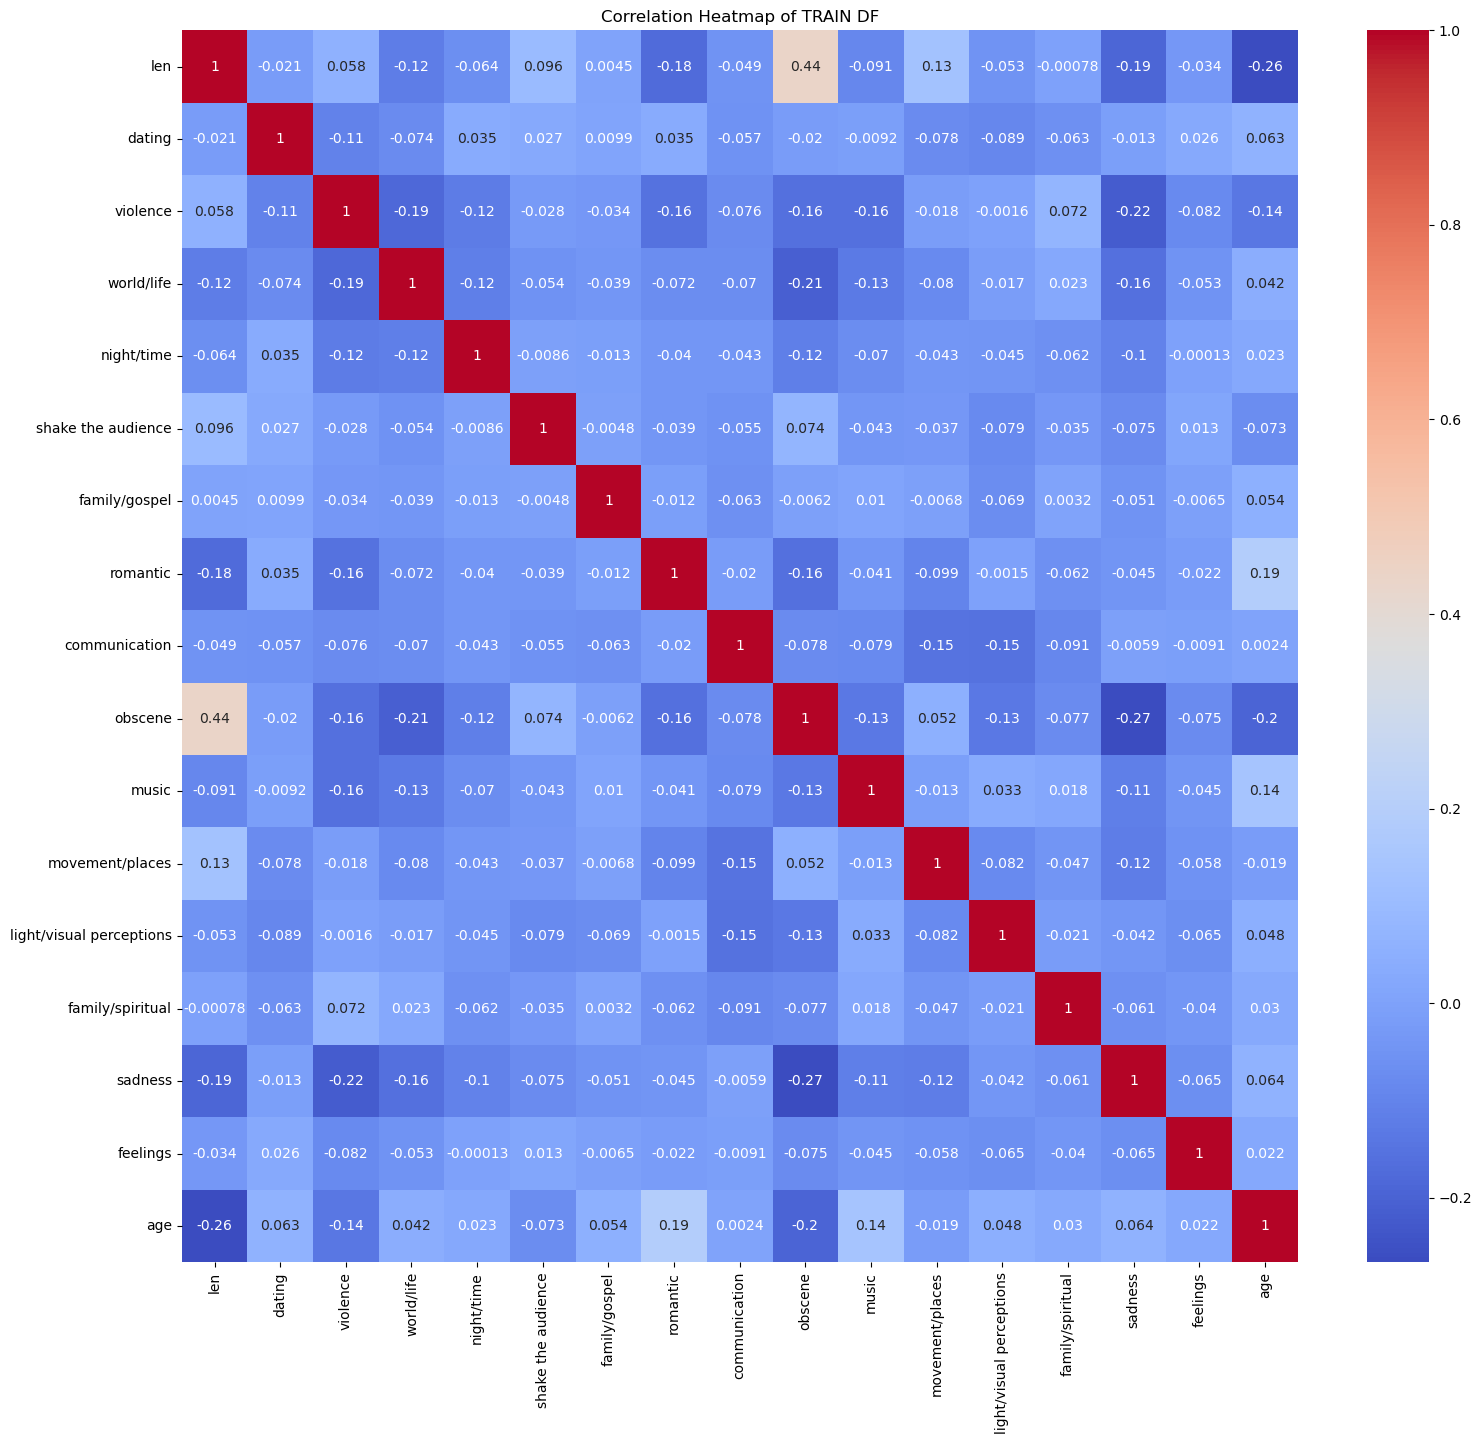

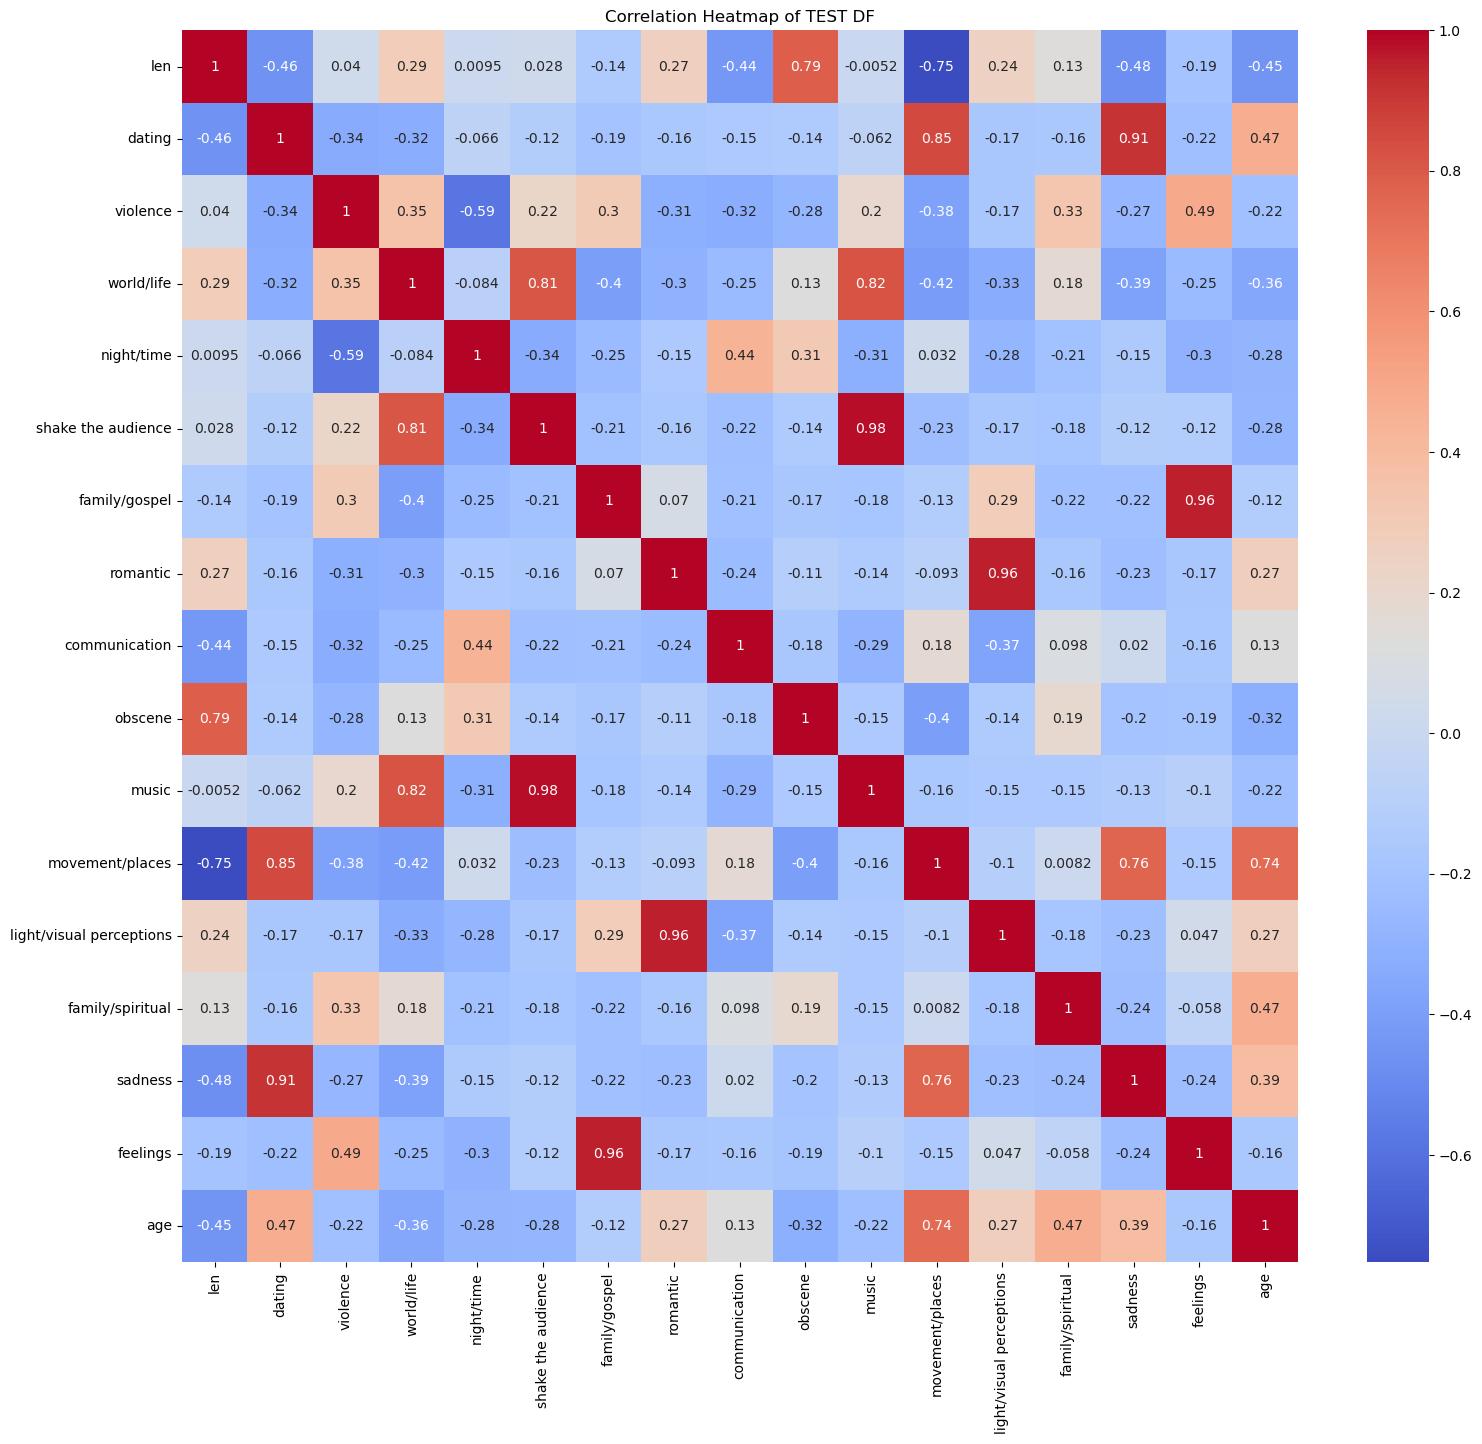

In [427]:
plt.figure(figsize=(18, 16))
sns.heatmap(df_cleaned_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of TRAIN DF')
plt.show()

plt.figure(figsize=(18, 16))
sns.heatmap(df_test_cleaned_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of TEST DF')
plt.show()

From the Heatmaps above we can determine 2 things: 
1. TEST DF is a mess and have a lot of high and low correlation between the features
2. in TRAIN DF the 'len' column have a high correlation with obstence topic. 

In [428]:
#Based on the correlation score of 0.44 I decided to drop it
columns_to_drop = ['Unnamed: 0', 'lyrics', 'len']
columns_to_drop_test = ['Unnamed: 0', 'lyrics', 'like/girls', 'len']

In [429]:
#implementing this changes to the clean DFs
df_cleaned = df.drop(columns=columns_to_drop)
df_test_cleaned = df_test.drop(columns= columns_to_drop_test)
df_cleaned_heatmap = df_cleaned.drop(columns=identifiers)
df_test_cleaned_heatmap = df_test_cleaned.drop(columns=identifiers)

Time for heatmaps 2.0 

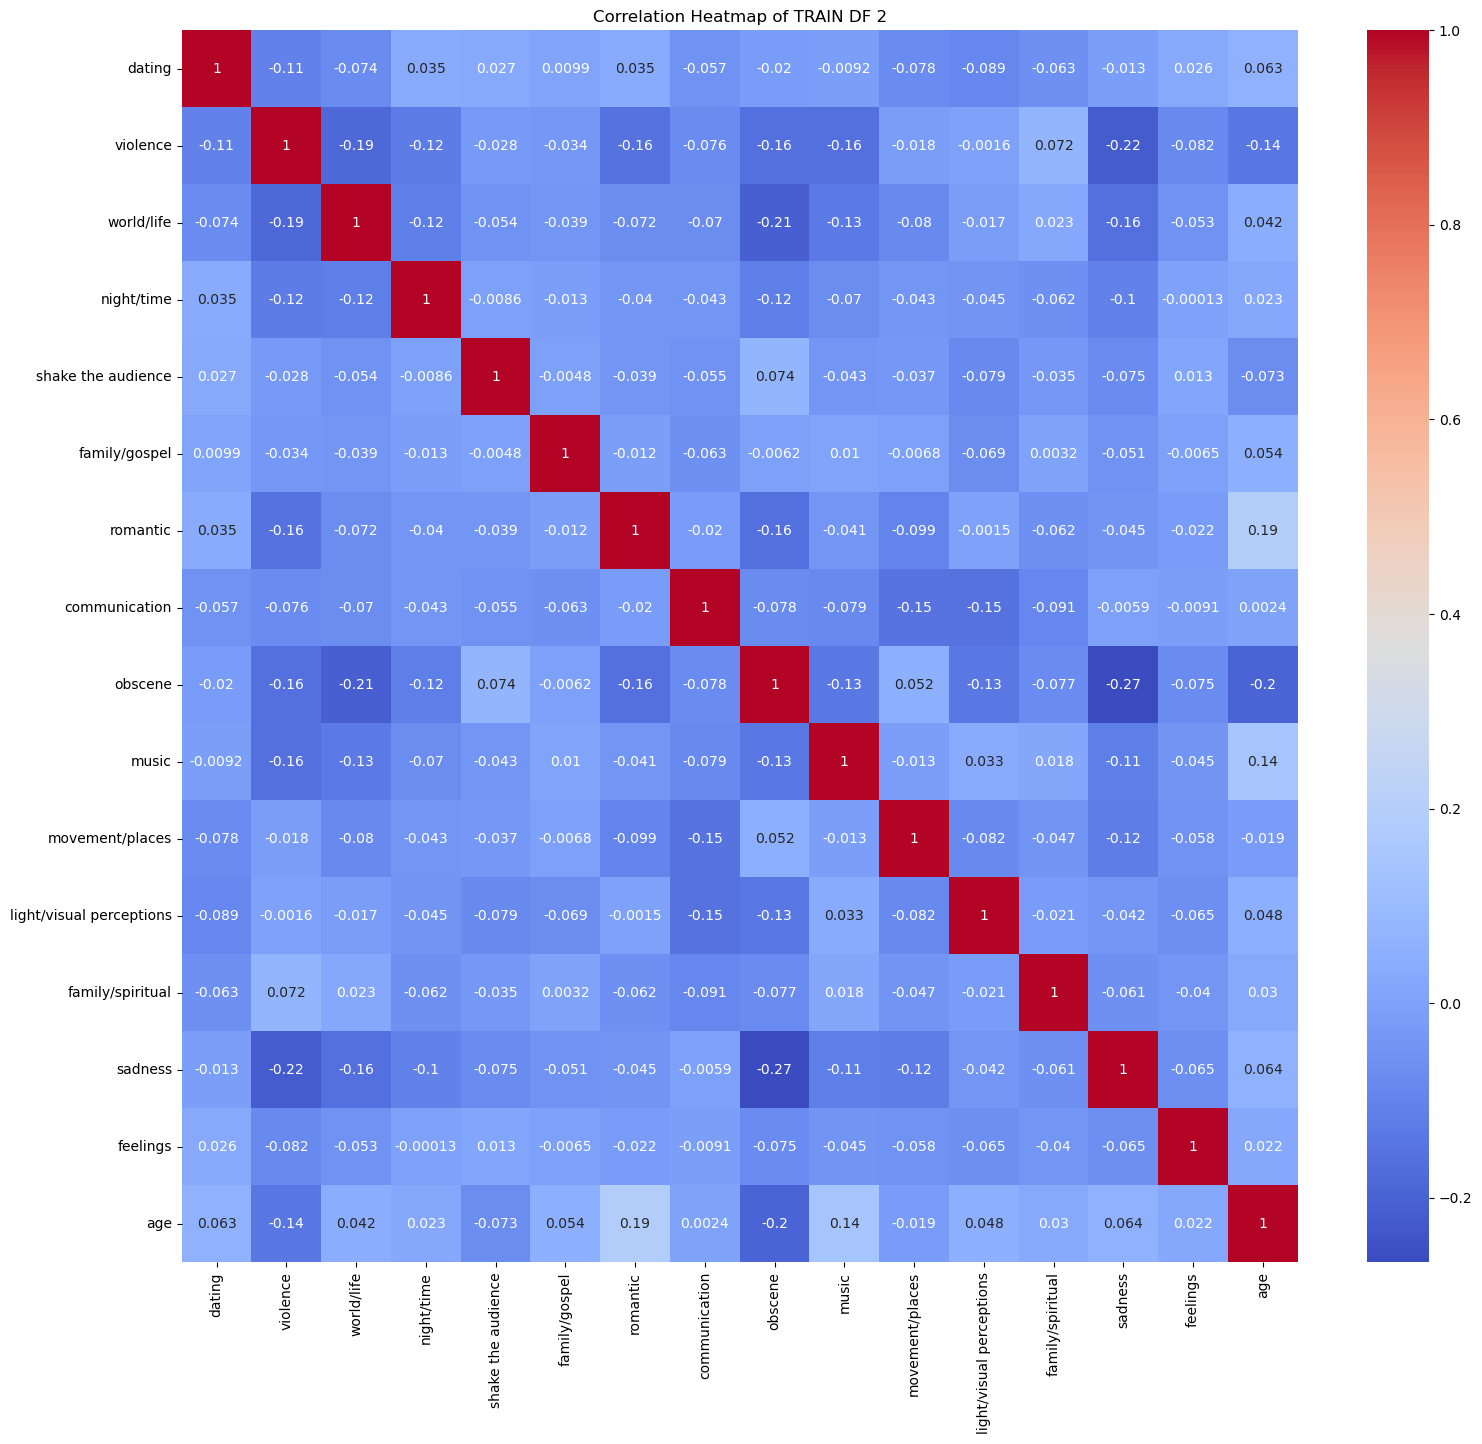

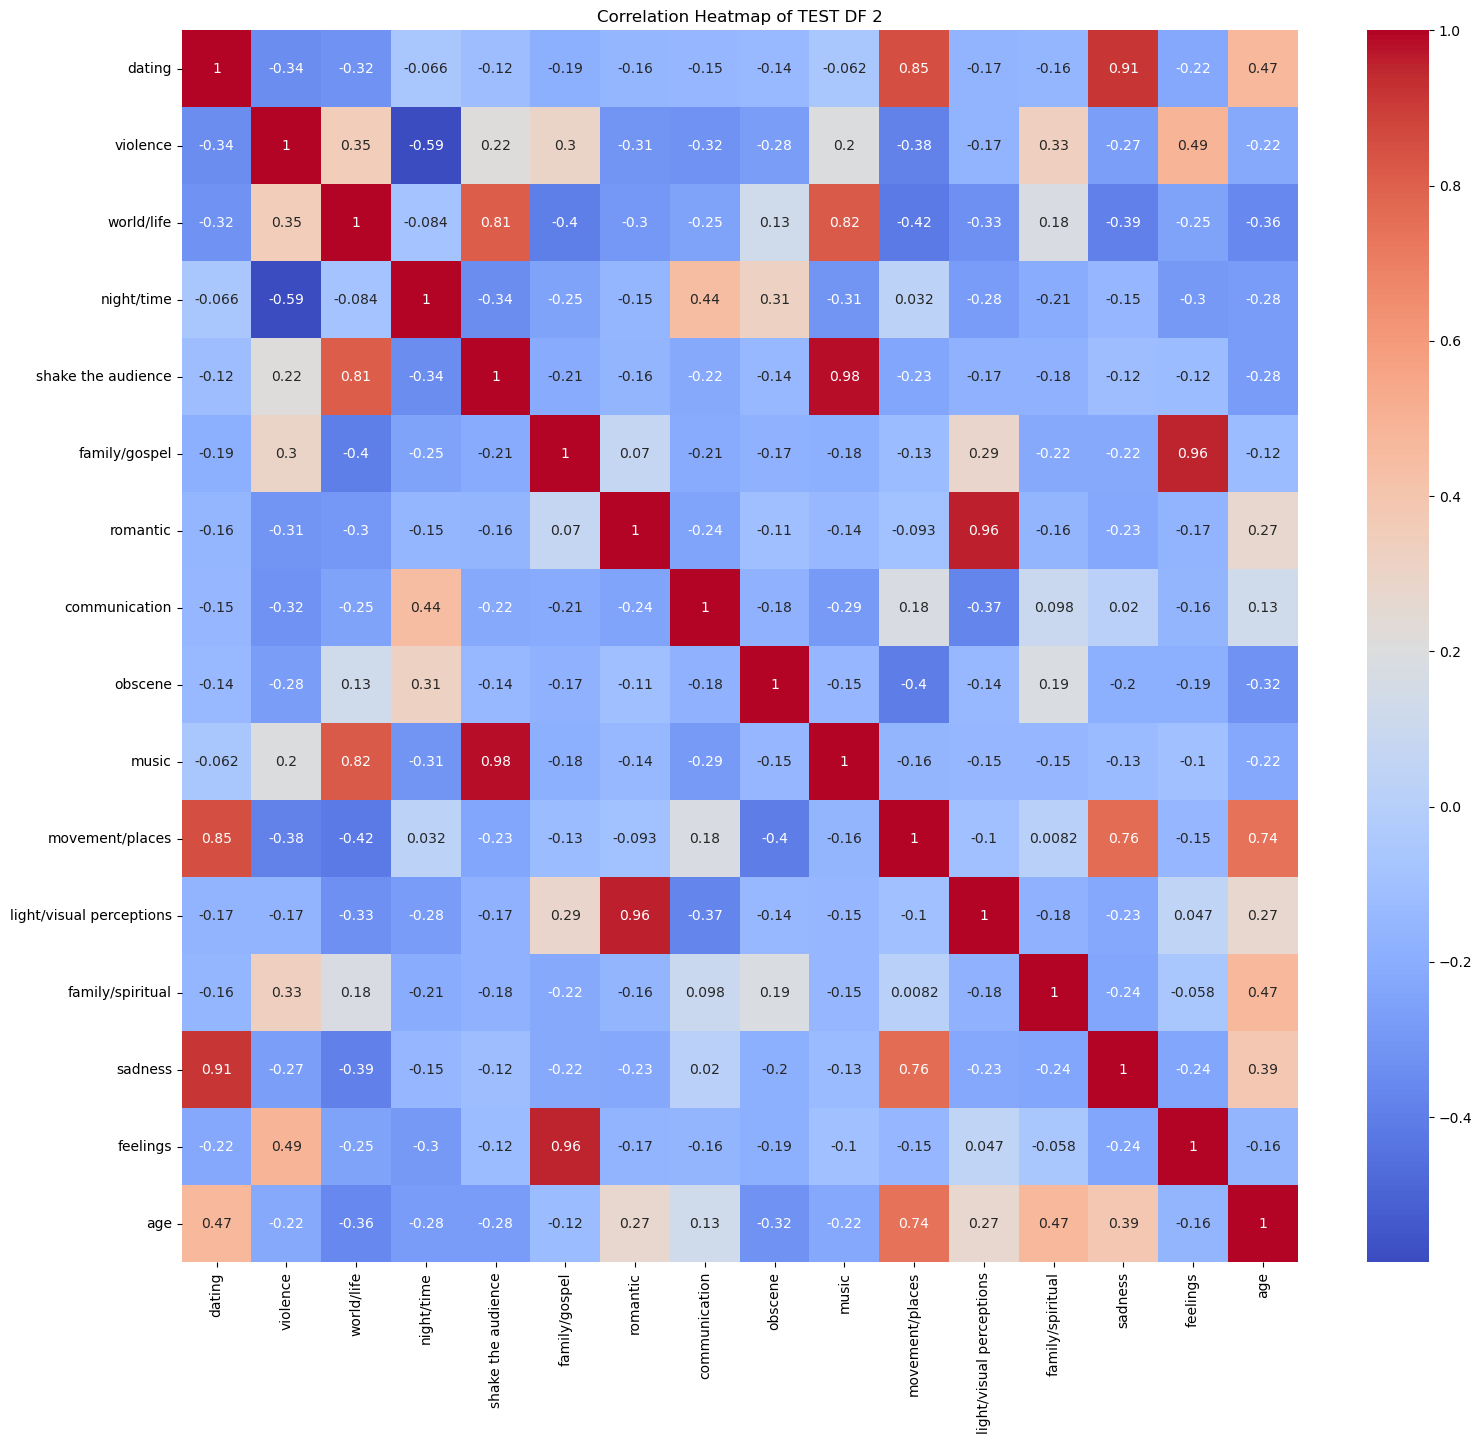

In [430]:
plt.figure(figsize=(18, 16))
sns.heatmap(df_cleaned_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of TRAIN DF 2')
plt.show()

plt.figure(figsize=(18, 16))
sns.heatmap(df_test_cleaned_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of TEST DF 2')
plt.show()

Data cleaning precess is done and now we can create new CSV files 

In [431]:
df_cleaned.to_csv("CleanedData.csv", index= False)
df_test_cleaned.to_csv("CleanedTestData.csv", index= False)